<a href="https://colab.research.google.com/github/PolyOdawo/MyDataScienceRepo/blob/master/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
import torch.nn as nn

In [0]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples = n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

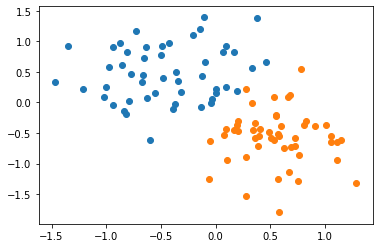

In [0]:
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [0]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [0]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

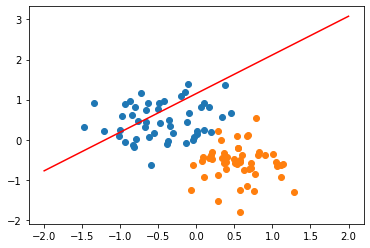

In [0]:
plot_fit('Initial Model')

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [0]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i ,"loss", loss.item())

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss 0.6185115575790405
epoch: 1 loss 0.6081148386001587
epoch: 2 loss 0.5980584621429443
epoch: 3 loss 0.5883299708366394
epoch: 4 loss 0.5789172649383545
epoch: 5 loss 0.5698079466819763
epoch: 6 loss 0.5609909892082214
epoch: 7 loss 0.5524548888206482
epoch: 8 loss 0.5441888570785522
epoch: 9 loss 0.5361825823783875
epoch: 10 loss 0.5284257531166077
epoch: 11 loss 0.5209088325500488
epoch: 12 loss 0.513622522354126
epoch: 13 loss 0.5065579414367676
epoch: 14 loss 0.49970608949661255
epoch: 15 loss 0.4930593967437744
epoch: 16 loss 0.48660901188850403
epoch: 17 loss 0.48034802079200745
epoch: 18 loss 0.47426894307136536
epoch: 19 loss 0.4683645963668823
epoch: 20 loss 0.46262848377227783
epoch: 21 loss 0.4570543169975281
epoch: 22 loss 0.451635479927063
epoch: 23 loss 0.44636669754981995
epoch: 24 loss 0.4412417709827423
epoch: 25 loss 0.43625572323799133
epoch: 26 loss 0.431403249502182
epoch: 27 loss 0.4266791045665741
epoch: 28 loss 0.42207926511764526
epoch: 29 loss 0.41

Text(0.5, 0, 'epoch')

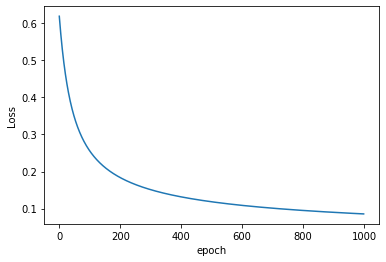

In [0]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

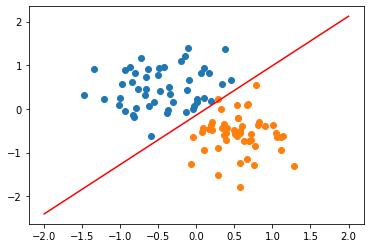

In [0]:
plot_fit('Trained Model')

Green point positive probability = 0.999265730381012
Black point positive probability = 0.0002657687000464648
Green point in class = 1
Black point in class = 0


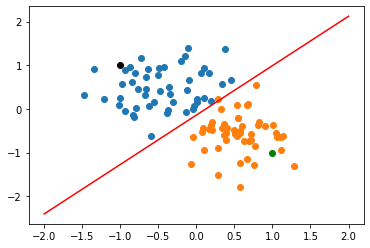

In [0]:
point1 = torch.tensor([1.0, -1.0])
point2 = torch.tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'go')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Green point positive probability = {}".format(model.forward(point1).item()))
print("Black point positive probability = {}".format(model.forward(point2).item()))
print("Green point in class = {}".format(model.predict(point1)))
print("Black point in class = {}".format(model.predict(point2)))
plot_fit('Trained Model')